In [9]:
!wget https://picsum.photos/200/300 -O img1.png -q

In [4]:
from skimage.transform import warp
from skimage import data
from skimage.transform import SimilarityTransform
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter
%matplotlib inline

## Q1

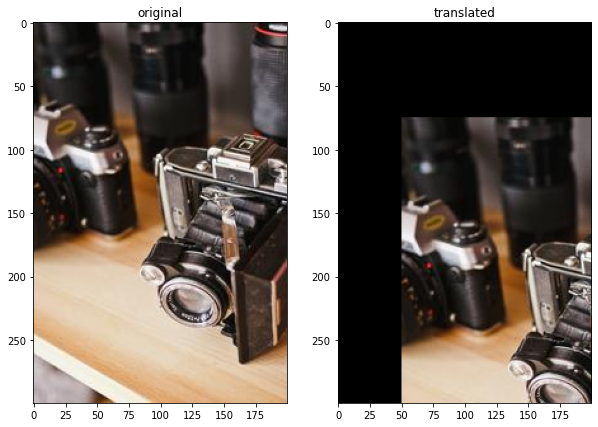

In [10]:
original = cv2.imread('img1.png', 1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

height, width = original.shape[:2] 
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]]) 

img_translation = cv2.warpAffine(original, T, (width, height)) 

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].imshow(original)
axs[0].set_title('original')

axs[1].imshow(img_translation)
axs[1].set_title('translated')

plt.show()

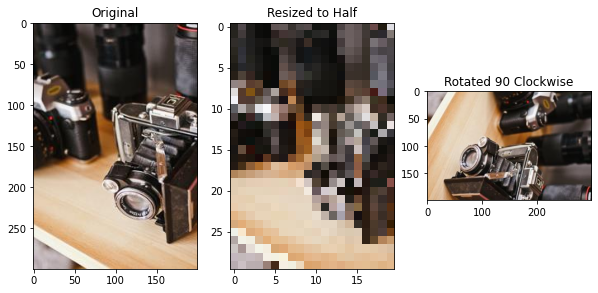

In [13]:
original = cv2.imread('img1.png', 1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

half = cv2.resize(original, (0, 0), fx = 0.1, fy = 0.1) 

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(original)
axs[0].set_title('Original')

axs[1].imshow(half)
axs[1].set_title('Resized to Half')

axs[2].imshow(cv2.rotate(original, cv2.ROTATE_90_CLOCKWISE))
axs[2].set_title('Rotated 90 Clockwise')

plt.show()

## Q2

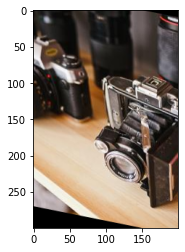

In [17]:
original = cv2.imread('img1.png', 1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

M2 = np.float32([[1, 0, 0], [0.2, 1, 0]])
M2[0,2] = -M2[0,1] * W/2
M2[1,2] = -M2[1,0] * H/2
sheared = cv2.warpAffine(original, M2, (W, H))

plt.imshow(sheared)

(2, 3)

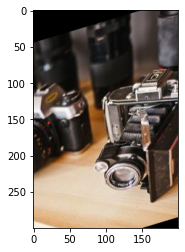

In [57]:
original = cv2.imread('img1.png', 1)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

M2 = np.float32([[1, 0, 0], [-0.3, 1, 0]])

M2[0,2] = -M2[0,1] * W/2
M2[1,2] = -M2[1,0] * H/2
sheared = cv2.warpAffine(original, M2, (W, H))

plt.imshow(sheared)
M2.shape

## Q3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


[]

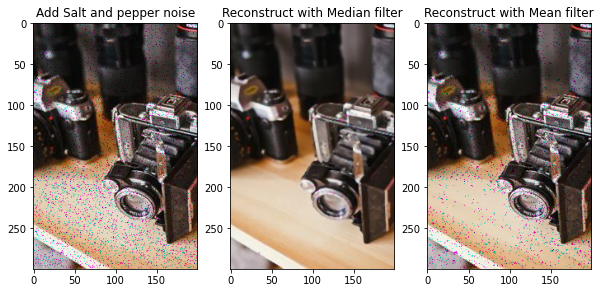

In [71]:
from PIL import Image, ImageFilter

original = cv2.imread('img1.png', 1)
image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

row,col,ch = image.shape
s_vs_p = 0.5
amount = 0.04
out = np.copy(image)

num_salt = np.ceil(amount * image.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
out[coords] = 1

num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
out[coords] = 0
plt.imsave('image.png', out)

im1 = Image.open(r"image.png")  

im2 = im1.filter(ImageFilter.MedianFilter(size = 3))  
im3 = im1.filter(ImageFilter.ModeFilter(size = 3))  

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(out)
axs[0].set_title('Add Salt and pepper noise')

axs[1].imshow(im2)
axs[1].set_title('Reconstruct with Median filter')

axs[2].imshow(im3)
axs[2].set_title('Reconstruct with Mean filter')

plt.plot()